In [51]:
import os
import re
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [3]:
sampling = 1
doc_folder = "crawl-dmoz-fr-100000-html/"
files = [file for file in os.listdir(doc_folder) if bool(re.match(r'part-[0-9]+', file))]
html_list = []

for file in files:
    filepath = os.path.join(doc_folder, file)
    print(filepath)
    file = open(filepath, 'r', encoding='utf-8')
    html_list += re.findall(r'<html[^>]*>.*?<\/html>', file.read(), re.DOTALL)
    break

print(len(html_list))

crawl-dmoz-fr-100000-html/part-00016
948


In [3]:
string = "<html>test</html><html>hello</html>   <html>yo</html>"
re.findall(r'<html.*?>(.+?)</html>', string)

['test', 'hello', 'yo']

In [4]:
html_list[0]

'<html> \n        <head> \n         <!--  Definition des variables  --> \n         <title>Ecole nationale supérieure d\'architecture et de paysage de Lille</title><meta http-equiv="Content-Language" content="fr"><meta name="Description" content="Site Internet officiel de l\'Ecole nationale supérieure d\'architecture et de paysage de Lille" lang="fr"><meta name="Keywords" content="école, architecture, paysage, lille, formation, paysagiste, architecte" lang="fr"><meta name="Publisher" content="http://www.sailing-up.com"><meta name="Copyright" content="&copy;©2006 EAPL"><meta name="Revisit-After" content="30 days"><meta http-equiv="imagetoolbar" content="no">\n   \n            <meta http-equiv="content-type" content="text/html;charset=UTF-8"> \n            <meta name="Author" content="http://www.sailing-up.com/"> \n            <meta name="Generator" content="http://www.wysiup.net/"> \n            <meta name="Robots" content="all"> \n            <meta name="Identifier-URL" content="www.lil

In [36]:
dic = {}

for html in html_list:
    test = re.findall(r'<[^!\</\-\?][^>/\n:]*>', html, re.DOTALL)
    for balise in test:
        if " " in balise:
            balise = balise.split(" ")[0] + ">"

        if not balise in dic:
            dic[balise] = 1
        else:
            dic[balise] += 1

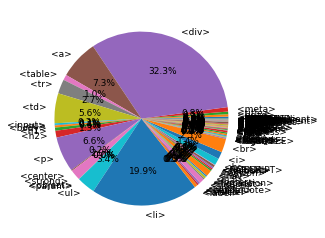

In [57]:
mpl.rcParams['font.size'] = 9.0

#plt.figure(figsize=(30,20))
plt.pie(dic.values(), labels=dic.keys(), autopct='%1.1f%%')
plt.savefig('pie.png')
plt.show()

In [58]:
dic

{'<A>': 10,
 '<B>': 16,
 '<BASE>': 2,
 '<BGSOUND>': 1,
 '<BODY>': 19,
 '<BR>': 565,
 '<CENTER>': 9,
 '<COL>': 2,
 '<DIV>': 31,
 '<EM>': 1,
 '<FIELDSET>': 1,
 '<FORM>': 1,
 '<H1>': 30,
 '<HEAD>': 2,
 '<HTML>': 1,
 '<I>': 57,
 '<IMG>': 5,
 '<INPUT>': 40,
 '<IfModule>': 1,
 '<LABEL>': 1,
 '<LEGEND>': 1,
 '<MARQUEE>': 4,
 '<META>': 261,
 '<NOSCRIPT>': 10,
 '<P>': 22,
 '<PARAM>': 9,
 '<SMALL>': 2,
 '<STRONG>': 2,
 '<SUP>': 6,
 '<TABLE>': 26,
 '<TD>': 48,
 '<TEXTAREA>': 11,
 '<TH>': 5,
 '<THEAD>': 1,
 '<TITLE>': 6,
 '<TR>': 46,
 '<Table>': 3,
 '<U>': 1,
 '<a>': 14289,
 '<abbr>': 117,
 '<address>': 35,
 '<area>': 53,
 '<article>': 556,
 '<aside>': 277,
 '<audio>': 1,
 '<b>': 2502,
 '<bR>': 2,
 '<base>': 6,
 '<big>': 57,
 '<blockquote>': 49,
 '<body>': 778,
 '<br>': 5002,
 '<button>': 580,
 '<canvas>': 1,
 '<caption>': 40,
 '<center>': 372,
 '<circle>': 22,
 '<cite>': 55,
 '<code>': 3,
 '<col>': 12,
 '<dd>': 507,
 '<defs>': 9,
 '<del>': 5,
 '<desc>': 2,
 '<dfn>': 48,
 '<div>': 63525,
 '<dl>': 